# 딥러닝 준비
## 1-1 주요 용어
1. 하이퍼파라미터
: 사용자가 직접 설정해주는 설정값으로 학습 속도나 반복 훈련 횟수를 의미
, 모델의 예측 성능을 높이기 위해선 하이퍼파라미터의 값을 조정하는 행위를 하이퍼파라미터 튜닝이라고 함
2. 과소적합&과대적합
: 모델이 충분히 학습되지 않아 예측 성능이 떨어진 경우, 혹은 반대로 학습 데이터를 지나치게 반복학습하게 되어 과하게 적합된 사태로 이 상태에서는 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 훈련 데이터에 대한 예측 성능이 좋지만 정작 중요한 예측 데이터에 대한 예측 오차가 발생할 확률이 커짐
3. Epoch
: 학습을 iteration 하면서 최적의 모델 가중치를 찾는 과정으로 1회의 훈련 루프를 1 epoch라고 함
4. 손실함수
: 딥러닝 모델의 출력값과 실제값의 차이로 딥러닝에 적용하는 손실함수는 모델의 목적에 따라 사용자가 정의해야 함
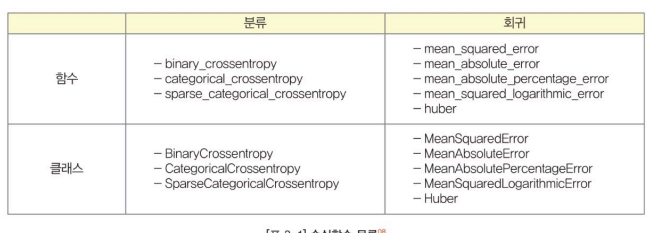
5. 경사하강법
: 딥러닝 모델을 학습할 때 모델 내부의 가중치에 대한 미분값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

In [2]:
import tensorflow as tf
# 클래스
tf.keras.losses.BinaryCrossentropy()
# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

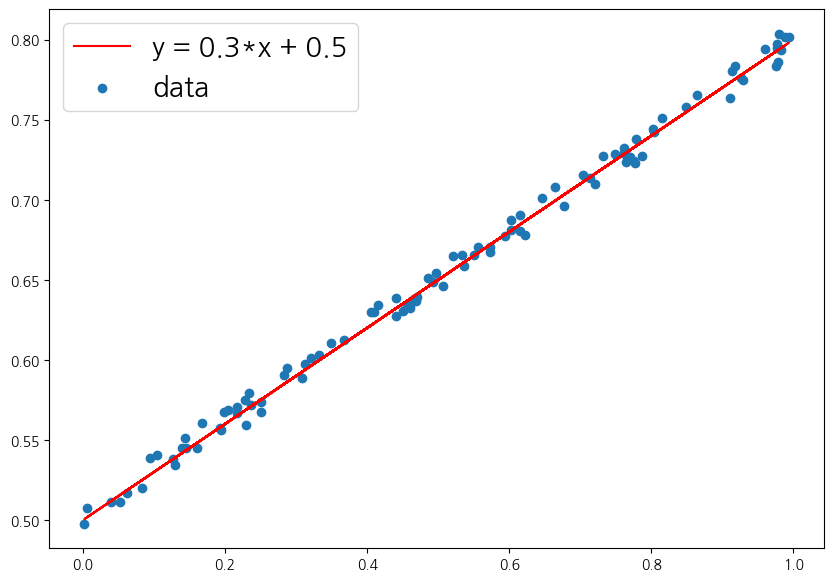

w: 0.3, b: 0.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [4]:
# 넘파이로 최적화하는 과정 구현해보기
# 최대 반복 횟수를 지정하고 오차가 0.005 이내로 수렴하면 반복문을 종료
# 반복문 안에서 손실함수를 정의하고 매 epoch마다 w,b에 대한 가중치 업데이트


# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.45007, b = 0.27797 error = 7.77218
 5 w = 0.47713, b = 0.40248 error = 0.14617
10 w = 0.45039, b = 0.41804 error = 0.10563
15 w = 0.42740, b = 0.43073 error = 0.07659
20 w = 0.40787, b = 0.44150 error = 0.05565
25 w = 0.39129, b = 0.45064 error = 0.04055
30 w = 0.37721, b = 0.45840 error = 0.02967
35 w = 0.36526, b = 0.46500 error = 0.02182
40 w = 0.35511, b = 0.47060 error = 0.01616
45 w = 0.34649, b = 0.47535 error = 0.01208
50 w = 0.33917, b = 0.47938 error = 0.00914
55 w = 0.33295, b = 0.48281 error = 0.00702
60 w = 0.32767, b = 0.48572 error = 0.00549
------------------------------------------------------------
63 w = 0.3, b = 0.5 error = 0.00478


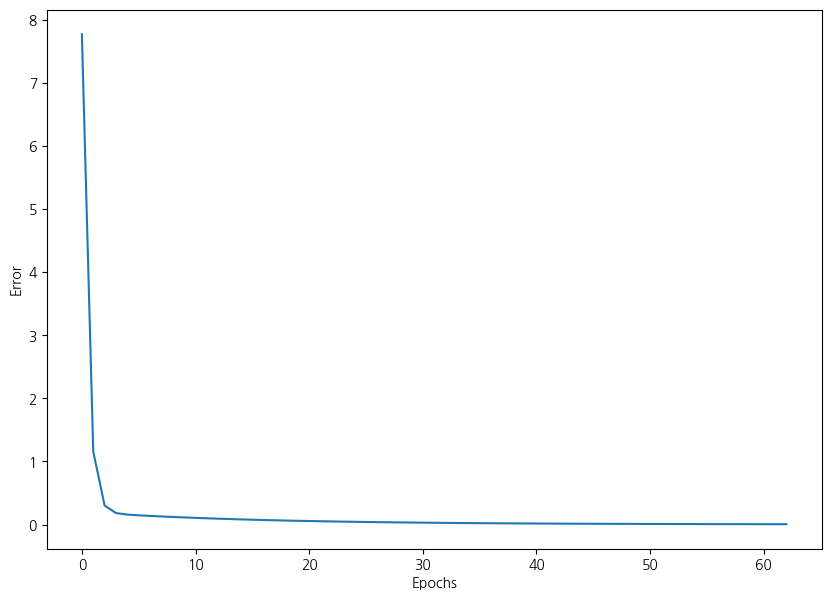

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 1-2 딥러닝 프로세스
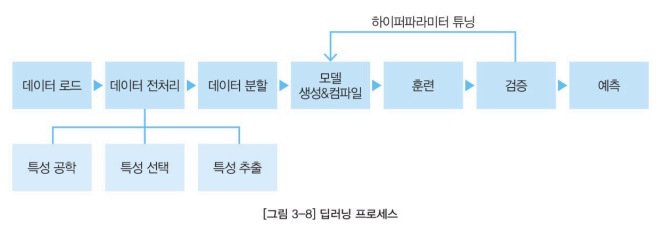
1. 데이터 전처리
: 모델에 주입하기 전에 데이터를 가공하는 단계로 배열의 차원을 변경하거나 스케일을 조정하는 등 다양한 방법이 있음, 이때 전처리 단계에서 처리한 데이터셋의 형태와 다음 단계에서 생성할 모델이 입력받을 데이터셋의 형태가 다르다면 에러가 발생할 수 있음
2. 모델 생성
: 순차적인 구조의 모델은 Sequential API로 구성, 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델을 Functional API 혹은 Model Subclassing으로 구현
3. 모델 컴파일
: 모델의 구조 정의하고 생성한 뒤에는 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표를 정의해야함, 모델 인스턴스에 complie()매서드를 적용하고 여러가지 속성값 설정해야 함
4. 모델 훈련
: fir()함수에 모델 훈련에 필요한 정보를 매개변수로 전달함, 이때 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기, callback 함수 등을 지정함
5. 모델 검증
: 훈련이 완료된 모델을 검증하는 단계로 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측값을 정답과 비교하여 평가지표를 개선함. 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이루어짐. 검증 겨로가를 바탕으로 다시 모델 생성 단꼐로 돌아가 모델 수정을 하고 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 도달할 때까지 과정을 반복함
6. 모델 예측
: 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델 예측하고 그 결과를 반환함

# 2 단순 신경망 훈련
## 2-1 선형 회귀
: 회귀분석이란 하나 이상의 독립변수들이 종속변수에 영향을 미치는 영향을 추정하는 통계기법임
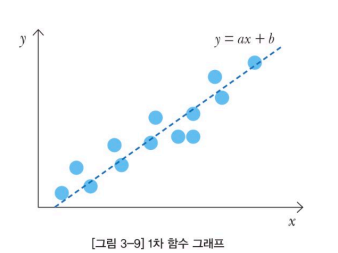
## 2-2 뉴런
: 인공신경망 모델을 구성하는 하나의 신경을 의미하고 node라고 불림, 여러개의 layer를 가지며 1개의 layer는 1개 이상의 뉴런으로 구성됨, 뉴런 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨
## 2-3 Dense Layer
: 심층신경망모델을 구성하는 기본 레이어로 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층이라고 불림.
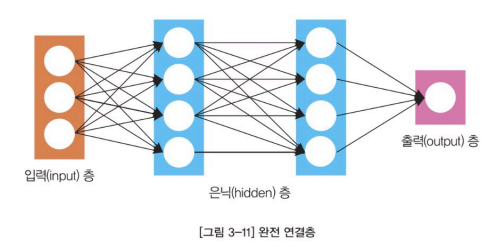
## 2-4 데이터셋 만들기

In [6]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


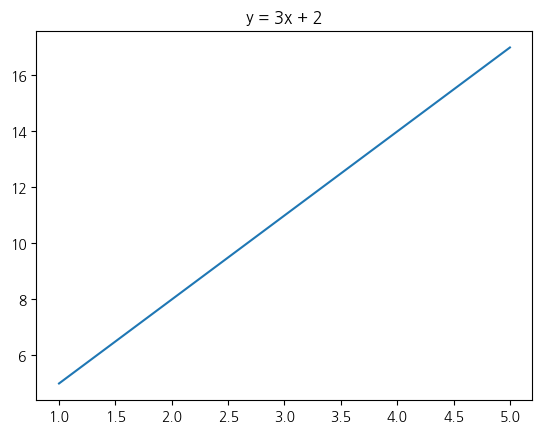

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

## 2-5 Sequentail API
: 층을 이어붙이는 시퀀스에 맞게 일렬로 연결하는 방식으로 입력레이어부터 출력레이어까지 순서를 가짐
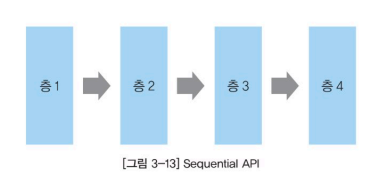

In [9]:
# 2-5-1 모델 구조
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [24]:
# 2-5-2 입력 데이터 형태
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [25]:
# 2-5-3 단순선형회귀모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])


## 2-6 모델 요약

In [26]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2-7 컴파일
: 모델 훈련 과정에서 사용할 optimizer, loss, metrics를 정의하고 클래스 인스턴스, 함수, 혹은 사전 정의된 문자열로 정의할 수 있음, 이때 클래스 인스턴스로 할 경우 learing rate, momentum 등의 하이퍼 파라미터를 사용자가 직접 지정할 수 있음, 하지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하며 하이퍼파리미터 수정은 어렵다는 한계가 있음

In [27]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [28]:
# 단순 선형 회귀 모델을 훈련시키기 위해서는 optimizers는 stochastic gradient descent로
# 손실함수로는 mean squared error로, 평가지표는 mean absolute error 이용
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## 2-8 훈련

In [17]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 555ms/step - loss: 7.8128e-05 - mae: 0.0076
Epoch 2/5
1/1 [==============================] - 0s 0s/step - loss: 7.7599e-05 - mae: 0.0076
Epoch 3/5
1/1 [==============================] - 0s 24ms/step - loss: 7.7067e-05 - mae: 0.0075
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 7.6548e-05 - mae: 0.0075
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 7.6035e-05 - mae: 0.0075


In [29]:
# 반복 횟수가 충분치않아 학습이 덜 되었음. 과소적합 상태임
# epoch 1200으로 지정하여 충분히 훈련할 수 있도록 하기
# 모델의 인스턴스를 새로 생성하고 컴파일하기
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 539ms/step - loss: 172.3122 - mae: 12.2122
Epoch 2/1200
1/1 [==============================] - 0s 16ms/step - loss: 100.4870 - mae: 9.3612
Epoch 3/1200
1/1 [==============================] - 0s 3ms/step - loss: 58.6304 - mae: 7.1848
Epoch 4/1200
1/1 [==============================] - 0s 8ms/step - loss: 34.2379 - mae: 5.5232
Epoch 5/1200
1/1 [==============================] - 0s 13ms/step - loss: 20.0228 - mae: 4.2546
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 11.7384 - mae: 3.2861
Epoch 7/1200
1/1 [==============================] - 0s 9ms/step - loss: 6.9102 - mae: 2.5466
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 4.0961 - mae: 1.9819
Epoch 9/1200
1/1 [==============================] - 0s 4ms/step - loss: 2.4557 - mae: 1.5508
Epoch 10/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.4993 - mae: 1.2215
Epoch 11/1200
1/1 [==============================] - 0s

1/1 [==============================] - 0s 16ms/step - loss: 0.0980 - mae: 0.2687
Epoch 88/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0973 - mae: 0.2678
Epoch 89/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0967 - mae: 0.2669
Epoch 90/1200
1/1 [==============================] - 0s 21ms/step - loss: 0.0960 - mae: 0.2660
Epoch 91/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0954 - mae: 0.2651
Epoch 92/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0947 - mae: 0.2642
Epoch 93/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0941 - mae: 0.2633
Epoch 94/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0935 - mae: 0.2624
Epoch 95/1200
1/1 [==============================] - 0s 14ms/step - loss: 0.0928 - mae: 0.2615
Epoch 96/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0922 - mae: 0.2606
Epoch 97/1200
1/1 [==============================] - 0s 0s/step - loss: 0.

1/1 [==============================] - 0s 17ms/step - loss: 0.0547 - mae: 0.2008
Epoch 174/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0544 - mae: 0.2001
Epoch 175/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0540 - mae: 0.1994
Epoch 176/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0536 - mae: 0.1988
Epoch 177/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0533 - mae: 0.1981
Epoch 178/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0529 - mae: 0.1974
Epoch 179/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0525 - mae: 0.1968
Epoch 180/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0522 - mae: 0.1961
Epoch 181/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0518 - mae: 0.1954
Epoch 182/1200
1/1 [==============================] - 0s 16ms/step - loss: 0.0515 - mae: 0.1948
Epoch 183/1200
1/1 [==============================] - 0s 0s/ste

Epoch 259/1200
1/1 [==============================] - 0s 13ms/step - loss: 0.0306 - mae: 0.1501
Epoch 260/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0304 - mae: 0.1496
Epoch 261/1200
1/1 [==============================] - 0s 12ms/step - loss: 0.0302 - mae: 0.1490
Epoch 262/1200
1/1 [==============================] - 0s 16ms/step - loss: 0.0300 - mae: 0.1485
Epoch 263/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0297 - mae: 0.1480
Epoch 264/1200
1/1 [==============================] - 0s 15ms/step - loss: 0.0295 - mae: 0.1475
Epoch 265/1200
1/1 [==============================] - 0s 12ms/step - loss: 0.0293 - mae: 0.1470
Epoch 266/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0291 - mae: 0.1465
Epoch 267/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0290 - mae: 0.1460
Epoch 268/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.0288 - mae: 0.1456
Epoch 269/1200
1/1 [========================

1/1 [==============================] - 0s 8ms/step - loss: 0.0172 - mae: 0.1125
Epoch 345/1200
1/1 [==============================] - 0s 5ms/step - loss: 0.0171 - mae: 0.1121
Epoch 346/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0170 - mae: 0.1118
Epoch 347/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.0168 - mae: 0.1114
Epoch 348/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0167 - mae: 0.1110
Epoch 349/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0166 - mae: 0.1106
Epoch 350/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0165 - mae: 0.1103
Epoch 351/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.0164 - mae: 0.1099
Epoch 352/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0163 - mae: 0.1095
Epoch 353/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0162 - mae: 0.1091
Epoch 354/1200
1/1 [==============================] - 0s 14ms/

Epoch 430/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0096 - mae: 0.0841
Epoch 431/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.0095 - mae: 0.0838
Epoch 432/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.0095 - mae: 0.0835
Epoch 433/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.0094 - mae: 0.0832
Epoch 434/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0093 - mae: 0.0830
Epoch 435/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0093 - mae: 0.0827
Epoch 436/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0092 - mae: 0.0824
Epoch 437/1200
1/1 [==============================] - 0s 13ms/step - loss: 0.0092 - mae: 0.0821
Epoch 438/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.0091 - mae: 0.0818
Epoch 439/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0090 - mae: 0.0816
Epoch 440/1200
1/1 [========================

1/1 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0631
Epoch 516/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0628
Epoch 517/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0053 - mae: 0.0626
Epoch 518/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.0053 - mae: 0.0624
Epoch 519/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0053 - mae: 0.0622
Epoch 520/1200
1/1 [==============================] - 0s 14ms/step - loss: 0.0052 - mae: 0.0620
Epoch 521/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0052 - mae: 0.0618
Epoch 522/1200
1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0616
Epoch 523/1200
1/1 [==============================] - 0s 15ms/step - loss: 0.0051 - mae: 0.0614
Epoch 524/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.0051 - mae: 0.0612
Epoch 525/1200
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 8ms/step - loss: 0.0030 - mae: 0.0471
Epoch 602/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.0030 - mae: 0.0470
Epoch 603/1200
1/1 [==============================] - 0s 5ms/step - loss: 0.0030 - mae: 0.0468
Epoch 604/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - mae: 0.0466
Epoch 605/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0029 - mae: 0.0465
Epoch 606/1200
1/1 [==============================] - 0s 12ms/step - loss: 0.0029 - mae: 0.0463
Epoch 607/1200
1/1 [==============================] - 0s 332us/step - loss: 0.0029 - mae: 0.0462
Epoch 608/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0460
Epoch 609/1200
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - mae: 0.0459
Epoch 610/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0028 - mae: 0.0457
Epoch 611/1200
1/1 [==============================] - 0s 3ms

1/1 [==============================] - 0s 9ms/step - loss: 0.0017 - mae: 0.0352
Epoch 688/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0017 - mae: 0.0351
Epoch 689/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0350
Epoch 690/1200
1/1 [==============================] - 0s 14ms/step - loss: 0.0016 - mae: 0.0349
Epoch 691/1200
1/1 [==============================] - 0s 0s/step - loss: 0.0016 - mae: 0.0347
Epoch 692/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - mae: 0.0346
Epoch 693/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0016 - mae: 0.0345
Epoch 694/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - mae: 0.0344
Epoch 695/1200
1/1 [==============================] - 0s 1ms/step - loss: 0.0016 - mae: 0.0343
Epoch 696/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0342
Epoch 697/1200
1/1 [==============================] - 0s 5ms/ste

1/1 [==============================] - 0s 9ms/step - loss: 9.4660e-04 - mae: 0.0264
Epoch 773/1200
1/1 [==============================] - 0s 2ms/step - loss: 9.4022e-04 - mae: 0.0263
Epoch 774/1200
1/1 [==============================] - 0s 10ms/step - loss: 9.3387e-04 - mae: 0.0262
Epoch 775/1200
1/1 [==============================] - 0s 9ms/step - loss: 9.2757e-04 - mae: 0.0261
Epoch 776/1200
1/1 [==============================] - 0s 8ms/step - loss: 9.2131e-04 - mae: 0.0261
Epoch 777/1200
1/1 [==============================] - 0s 11ms/step - loss: 9.1510e-04 - mae: 0.0260
Epoch 778/1200
1/1 [==============================] - 0s 2ms/step - loss: 9.0891e-04 - mae: 0.0259
Epoch 779/1200
1/1 [==============================] - 0s 15ms/step - loss: 9.0276e-04 - mae: 0.0258
Epoch 780/1200
1/1 [==============================] - 0s 0s/step - loss: 8.9667e-04 - mae: 0.0257
Epoch 781/1200
1/1 [==============================] - 0s 4ms/step - loss: 8.9061e-04 - mae: 0.0256
Epoch 782/1200
1/1 [===

1/1 [==============================] - 0s 12ms/step - loss: 5.4319e-04 - mae: 0.0200
Epoch 855/1200
1/1 [==============================] - 0s 9ms/step - loss: 5.3952e-04 - mae: 0.0199
Epoch 856/1200
1/1 [==============================] - 0s 5ms/step - loss: 5.3589e-04 - mae: 0.0199
Epoch 857/1200
1/1 [==============================] - 0s 4ms/step - loss: 5.3227e-04 - mae: 0.0198
Epoch 858/1200
1/1 [==============================] - 0s 17ms/step - loss: 5.2868e-04 - mae: 0.0197
Epoch 859/1200
1/1 [==============================] - 0s 13ms/step - loss: 5.2510e-04 - mae: 0.0197
Epoch 860/1200
1/1 [==============================] - 0s 0s/step - loss: 5.2155e-04 - mae: 0.0196
Epoch 861/1200
1/1 [==============================] - 0s 2ms/step - loss: 5.1804e-04 - mae: 0.0195
Epoch 862/1200
1/1 [==============================] - 0s 6ms/step - loss: 5.1453e-04 - mae: 0.0195
Epoch 863/1200
1/1 [==============================] - 0s 16ms/step - loss: 5.1107e-04 - mae: 0.0194
Epoch 864/1200
1/1 [==

1/1 [==============================] - 0s 9ms/step - loss: 3.1169e-04 - mae: 0.0152
Epoch 937/1200
1/1 [==============================] - 0s 10ms/step - loss: 3.0958e-04 - mae: 0.0151
Epoch 938/1200
1/1 [==============================] - 0s 10ms/step - loss: 3.0750e-04 - mae: 0.0151
Epoch 939/1200
1/1 [==============================] - 0s 8ms/step - loss: 3.0543e-04 - mae: 0.0150
Epoch 940/1200
1/1 [==============================] - 0s 9ms/step - loss: 3.0336e-04 - mae: 0.0149
Epoch 941/1200
1/1 [==============================] - 0s 12ms/step - loss: 3.0131e-04 - mae: 0.0149
Epoch 942/1200
1/1 [==============================] - 0s 1ms/step - loss: 2.9928e-04 - mae: 0.0148
Epoch 943/1200
1/1 [==============================] - 0s 17ms/step - loss: 2.9726e-04 - mae: 0.0148
Epoch 944/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.9525e-04 - mae: 0.0147
Epoch 945/1200
1/1 [==============================] - 0s 3ms/step - loss: 2.9326e-04 - mae: 0.0147
Epoch 946/1200
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 1.7886e-04 - mae: 0.0115
Epoch 1019/1200
1/1 [==============================] - 0s 16ms/step - loss: 1.7765e-04 - mae: 0.0114
Epoch 1020/1200
1/1 [==============================] - 0s 5ms/step - loss: 1.7645e-04 - mae: 0.0114
Epoch 1021/1200
1/1 [==============================] - 0s 20ms/step - loss: 1.7526e-04 - mae: 0.0114
Epoch 1022/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.7408e-04 - mae: 0.0113
Epoch 1023/1200
1/1 [==============================] - 0s 16ms/step - loss: 1.7291e-04 - mae: 0.0113
Epoch 1024/1200
1/1 [==============================] - 0s 4ms/step - loss: 1.7175e-04 - mae: 0.0112
Epoch 1025/1200
1/1 [==============================] - 0s 15ms/step - loss: 1.7058e-04 - mae: 0.0112
Epoch 1026/1200
1/1 [==============================] - 0s 3ms/step - loss: 1.6943e-04 - mae: 0.0112
Epoch 1027/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.6828e-04 - mae: 0.0111
Epoch 1028/1

1/1 [==============================] - 0s 10ms/step - loss: 1.0334e-04 - mae: 0.0087
Epoch 1100/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.0264e-04 - mae: 0.0087
Epoch 1101/1200
1/1 [==============================] - 0s 10ms/step - loss: 1.0194e-04 - mae: 0.0087
Epoch 1102/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.0126e-04 - mae: 0.0086
Epoch 1103/1200
1/1 [==============================] - 0s 0s/step - loss: 1.0057e-04 - mae: 0.0086
Epoch 1104/1200
1/1 [==============================] - 0s 5ms/step - loss: 9.9896e-05 - mae: 0.0086
Epoch 1105/1200
1/1 [==============================] - 0s 14ms/step - loss: 9.9222e-05 - mae: 0.0085
Epoch 1106/1200
1/1 [==============================] - 0s 0s/step - loss: 9.8553e-05 - mae: 0.0085
Epoch 1107/1200
1/1 [==============================] - 0s 4ms/step - loss: 9.7895e-05 - mae: 0.0085
Epoch 1108/1200
1/1 [==============================] - 0s 16ms/step - loss: 9.7231e-05 - mae: 0.0085
Epoch 1109/1

1/1 [==============================] - 0s 17ms/step - loss: 5.9707e-05 - mae: 0.0066
Epoch 1181/1200
1/1 [==============================] - 0s 0s/step - loss: 5.9299e-05 - mae: 0.0066
Epoch 1182/1200
1/1 [==============================] - 0s 993us/step - loss: 5.8900e-05 - mae: 0.0066
Epoch 1183/1200
1/1 [==============================] - 0s 17ms/step - loss: 5.8504e-05 - mae: 0.0066
Epoch 1184/1200
1/1 [==============================] - 0s 0s/step - loss: 5.8111e-05 - mae: 0.0065
Epoch 1185/1200
1/1 [==============================] - 0s 17ms/step - loss: 5.7720e-05 - mae: 0.0065
Epoch 1186/1200
1/1 [==============================] - 0s 0s/step - loss: 5.7325e-05 - mae: 0.0065
Epoch 1187/1200
1/1 [==============================] - 0s 0s/step - loss: 5.6941e-05 - mae: 0.0065
Epoch 1188/1200
1/1 [==============================] - 0s 22ms/step - loss: 5.6560e-05 - mae: 0.0065
Epoch 1189/1200
1/1 [==============================] - 0s 10ms/step - loss: 5.6170e-05 - mae: 0.0064
Epoch 1190/12

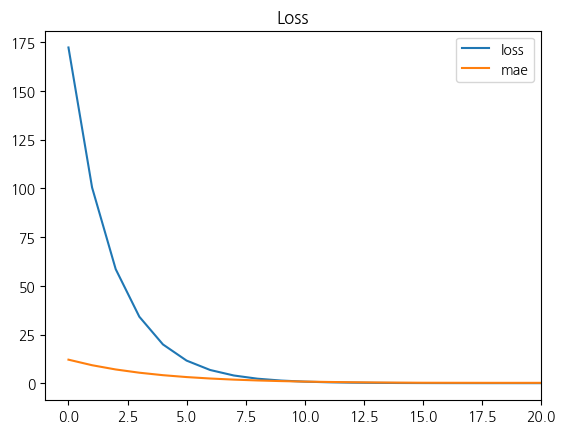

In [30]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

## 2-9 검증

In [31]:
model.evaluate(x, y)

1/1 [==============================] - 0s 267ms/step - loss: 5.1790e-05 - mae: 0.0062


[5.17901498824358e-05, 0.006176757626235485]

## 2-10 예측

In [32]:
model.predict([10])

1/1 [==============================] - 0s 195ms/step


array([[32.029854]], dtype=float32)

# 3 심층신경망으로 이미지 분류
## 3-1 케라스 내장 데이터셋 로드

In [34]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 5s 0us/step
train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


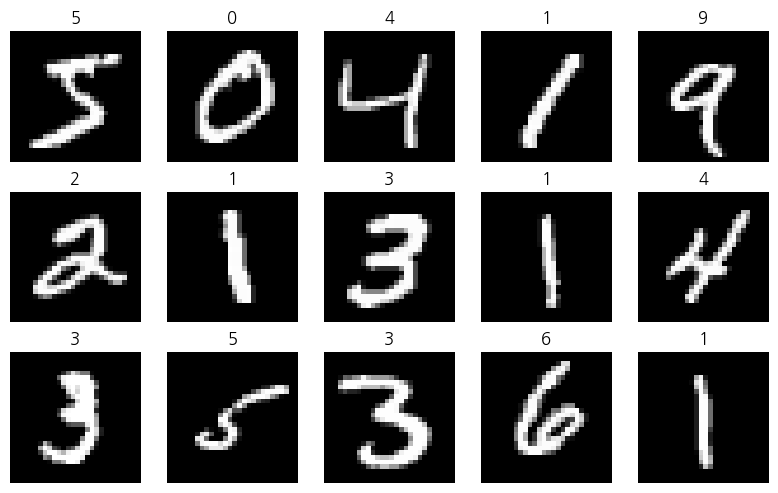

In [35]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

## 3-2 데이터 전처리


In [36]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [37]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [38]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [40]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

## 3-3 Flatten 레이어
: dense 레이어에는 입력값으로 1차원 배열이 들어가야 하므로 이미지 데이터를 1차원으로 전처리하여 주입해야 함

In [41]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [42]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
# 784=28x28
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


## 3-4 활성화 함수
- 목적에 따라 지정하여 사용
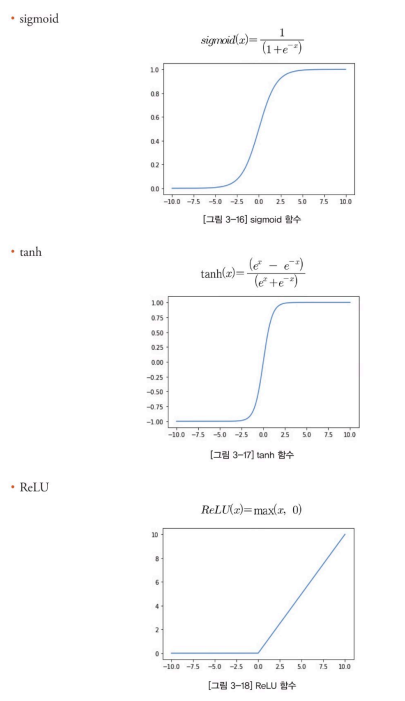
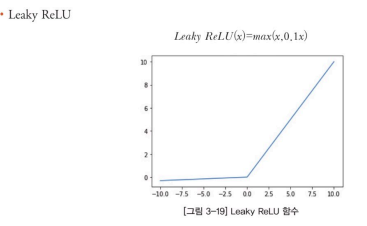

In [43]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')     

In [44]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

## 3-5 입력과 출력

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [46]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

## 3-6 손실함수
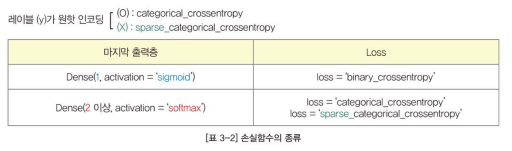

In [47]:
# 출력 노드가 1개, sigmoid 활성화 함수를 적용한 경우
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [48]:
# 출력 노드가 2개 이상, softmax 활성화 함수를 적용한 경우
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

## 3-7 옵티마이저
- 케라스에서 지원하는 옵티마이저 목록
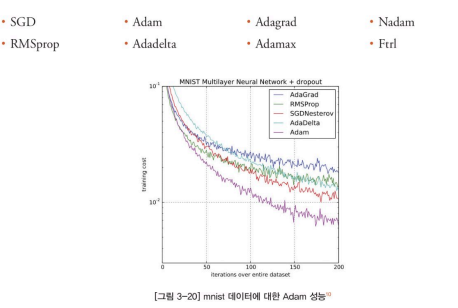

In [49]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

## 3-8 평가지표
- accuary가 가장 많이 사용, auc, precision, recall 등의 지표도 사용됨
- 리스트 형태로 하나 이상의 평가지표를 사용할 수도 있음

In [50]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [51]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## 3-9 훈련

In [52]:
model.fit(x_train, y_train, 
          # 검증셋 지정
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2239 - accuracy: 0.9321 - val_loss: 0.1080 - val_accuracy: 0.9685
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0933 - accuracy: 0.9715 - val_loss: 0.1005 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0848 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0784 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0409 - accuracy: 0.9866 - val_loss: 0.0866 - val_accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0936 - val_accuracy: 0.9752
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0759 - val_accuracy

## 3-10 평가

In [53]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9789
검증셋 정확도: 0.9789000153541565


## 3-11 예측

In [54]:
predictions = model.predict(x_test)
predictions[0]
# 10개의 개별 클래스에 대한 분류 확률값을 의미함

313/313 [==============================] - 1s 2ms/step


array([1.5804422e-11, 8.9605528e-06, 2.3122210e-07, 2.8282996e-06,
       3.4228907e-07, 2.6162281e-10, 6.8157513e-13, 9.9998105e-01,
       1.6307558e-09, 6.5729964e-06], dtype=float32)

In [55]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


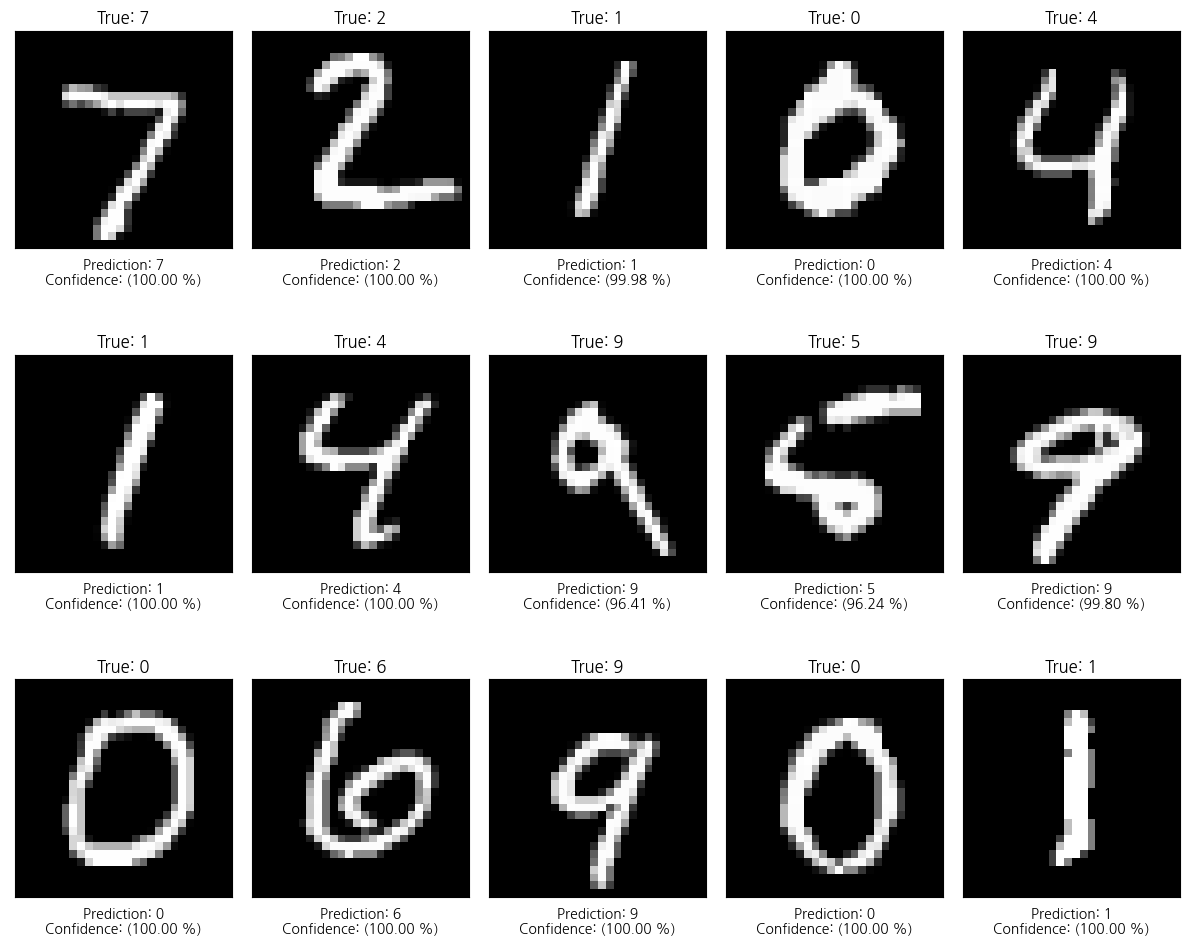

In [56]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()